In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df= pd.read_csv(r"C:\Users\U6056186\Downloads\data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [13]:
(df.isnull().mean()>0)

enrollee_id               False
city                      False
city_development_index     True
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
training_hours             True
target                    False
dtype: bool

In [14]:
(df.isnull().mean()<0.05) 

enrollee_id                True
city                       True
city_development_index     True
gender                    False
relevent_experience        True
enrolled_university        True
education_level            True
major_discipline          False
experience                 True
company_size              False
company_type              False
training_hours             True
target                     True
dtype: bool

In [9]:
df.shape

(19158, 13)

In [5]:
col = [var for var in df.columns if df[var].isnull().mean() > 0 
       and df[var].isnull().mean()<0.05 ]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5455,0.923,no_enrollment,Masters,20.0,24.0
9534,0.910,no_enrollment,Masters,2.0,20.0
4809,0.804,no_enrollment,Graduate,13.0,72.0
6387,NaN,no_enrollment,Graduate,6.0,134.0
2013,0.920,no_enrollment,Graduate,17.0,67.0


In [8]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [10]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [13]:
new_df= df[col].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

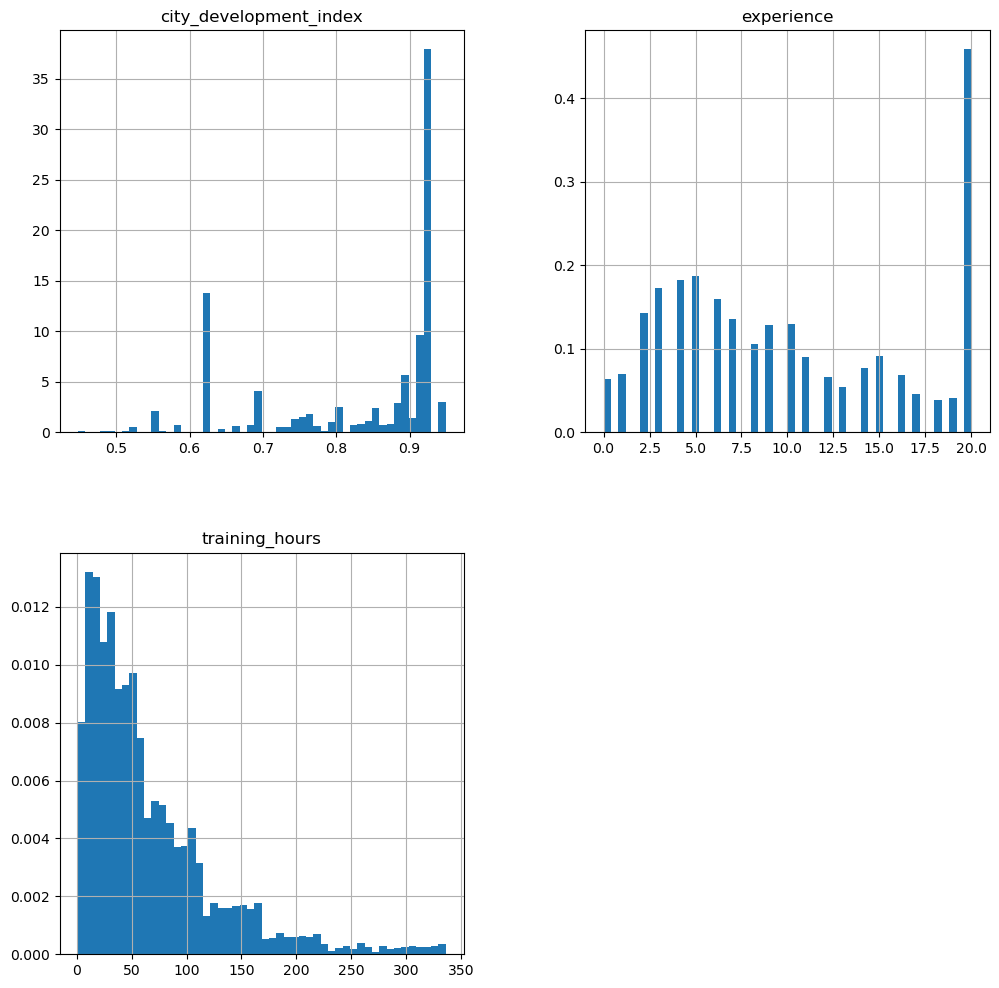

In [21]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

<Axes: >

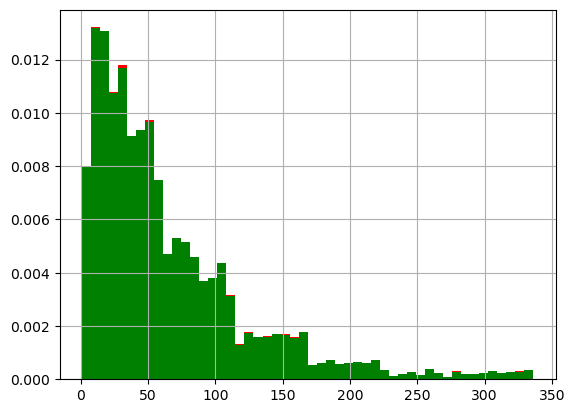

In [33]:
fig = plt.figure()
ax= fig.add_subplot(111)

new_df['training_hours'].hist(bins=50,density=True,ax=ax,color='r')
df['training_hours'].hist(bins=50,density=True,ax=ax,color='g')

<Axes: ylabel='Density'>

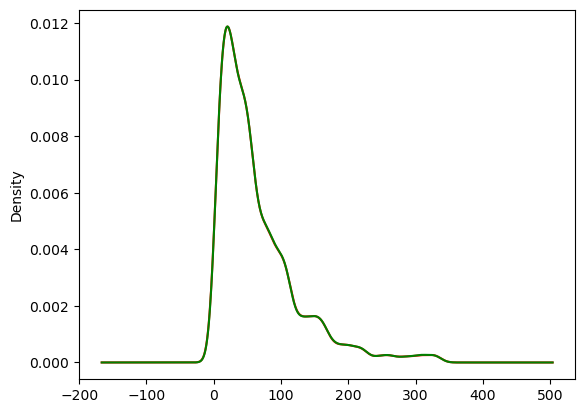

In [36]:
plt.clf()
new_df['training_hours'].plot.density(color='r')
df['training_hours'].plot.density(color='g')

<Axes: ylabel='Density'>

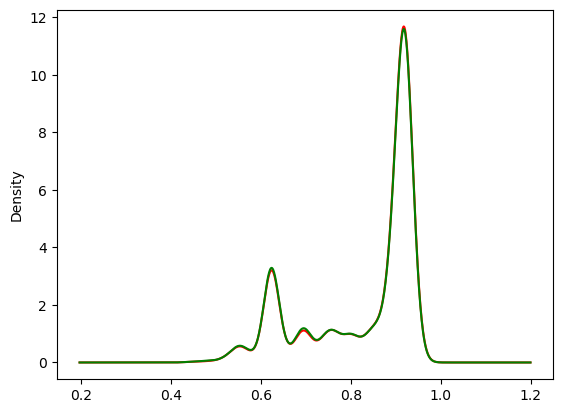

In [38]:
plt.clf()
new_df['city_development_index'].plot.density(color='r')
df['city_development_index'].plot.density(color='g')

<Axes: >

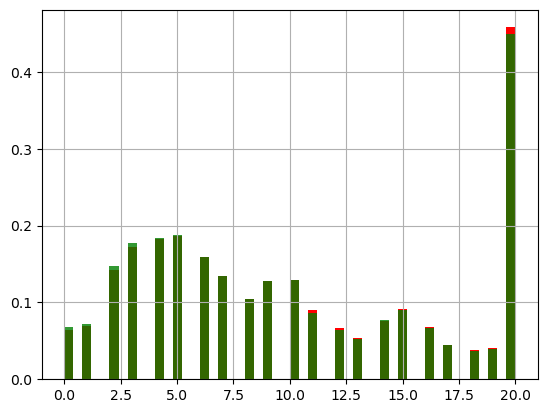

In [43]:
fig = plt.figure()
ax= fig.add_subplot(111)
new_df['experience'].hist(bins=50,density=True,ax=ax,color='r')
df['experience'].hist(bins=50,density=True,ax=ax,color='g',alpha=0.8)

<Axes: ylabel='Density'>

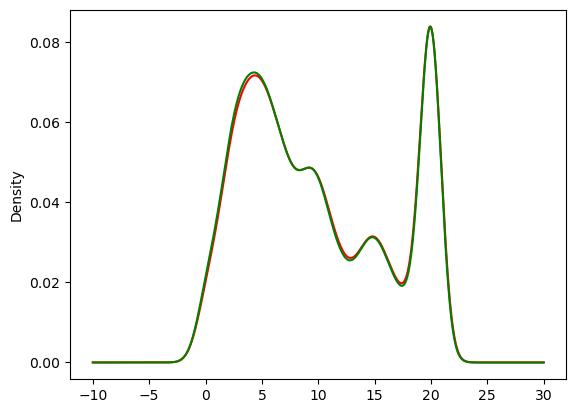

In [45]:
plt.clf()
new_df['experience'].plot.density(color='r')
df['experience'].plot.density(color='g')

In [50]:
temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df), 
    new_df['enrolled_university'].value_counts()/len(df)],
    axis=1)
temp

,enrolled_university,enrolled_university
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469
